In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# # 128, 86, 256
# x00 = np.fromfile('res/0_0_0.mat')
# x00 = x00.reshape(130,88,258)
# x10 = np.fromfile('res/1_0_0.mat')
# x10 = x10.reshape(130,88,258)

In [3]:
# (x00[-1]-x10[1])[1:-2,1:-2].max()

In [4]:
shape = [128, 128, 128]
arr = np.fromfile('res/0_0_0.mat')
arr = arr.reshape(shape[0]+2, shape[2]+2, shape[2]+2)
# print((arr[:,0,:] - arr[:,-2,:])[1:-2,1:-2].max())
arr = arr[1:-1,1:-1,1:-1]
print(arr.shape)

(128, 128, 128)


In [5]:
class U4D:
    def __init__(self, L):
        self.L = L
        self.a_t = np.pi*np.sqrt( 9/(L[0]**2) + 4/(L[1]**2) + 4/(L[2]**2) )
    
    def __call__(self, X, Y, z, t):
        return np.sin(X*3*np.pi/self.L[0])*np.sin(Y*2*np.pi/self.L[1])*np.sin(z*2*np.pi/self.L[2])*\
        np.cos(self.a_t*t + 4*np.pi);

In [6]:
L = np.array([1, 1, 1])
h = L/shape
T = 0.025

x = np.linspace(0, L[0], shape[0])
y = np.linspace(0, L[1], shape[1])

X, Y = np.meshgrid(x, y)
U = U4D(L)(X, Y, 0, 0)
F = np.sin(X*10)+Y

In [40]:
font = {
    "family" : "monospace",
    "weight" : "normal",
    "size"   : 20
}

matplotlib.rc("font", **font)

# Turn interactive plotting off
# plt.ioff()

for z_i in range(shape[2]):
    fig = plt.figure(figsize=(30,10))
    U = U4D(L)(X, Y, h[2]*z_i, T)
    
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.plot_surface(X, Y, U, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title('analytical U')
    ax.set_zlim3d(-0.8,0.8)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')


    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.plot_surface(X, Y, arr[:,:,z_i].T, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title('discrete U');
    ax.set_zlim3d(-0.8,0.8)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u');

    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.plot_surface(X, Y, arr[:,:,z_i].T - U, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title('diff');
    ax.set_zlim3d(-0.4, 0.4)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u');


    plt.savefig('imgs/{0:03}.png'.format(z_i))

# plt.show()

In [9]:
# fig, axes = plt.subplots(1, 1, figsize=(20, 6))
# fig.suptitle("F(X)", fontsize=20)

# axes.plot(x, F[1])

# plt.show()

### Saving images to gif

In [10]:
from array2gif import write_gif
from os import listdir
from os.path import isfile, join
from skimage.io import imread
from skimage import img_as_ubyte
from PIL import Image

In [11]:
def get_files(path):
    return sorted([f for f in listdir(path) if isfile(join(path, f))])

def load_images(path):
    filenames = get_files(path)
    imgs = []
    for name in filenames:
        curr_img = Image.open(join(path, name))
        imgs.append(curr_img)
    
    return imgs

In [12]:
images = load_images("imgs")

In [13]:
images[0].save(fp="graphics.gif", format='GIF', append_images=images,
         save_all=True, duration=100, loop=0)

### Drawing error plot

In [14]:
err_128 = [4.08627e-08, 0.00188301,
0.00555164, 0.0108176, 0.0174137, 0.0250108,
0.0332384, 0.0417075, 0.0500341, 0.0578618,
0.0648821, 0.0708501, 0.0755964, 0.0790327,
0.0811526, 0.082026, 0.081789, 0.0806306,
0.0787753, 0.0764651]

err_256 = [8.0648e-09,
0.00376857, 0.0105319, 0.0189412, 0.0274115,
0.0345064, 0.0392608, 0.0413591, 0.041128,
0.0393629, 0.0412037, 0.0428233, 0.0421387,
0.0398454, 0.0427579, 0.0434621, 0.0420957,
0.0418737, 0.0437387, 0.0434591]

err_512 = [1.35833e-10,
0.00753841, 0.0164359, 0.0206623, 0.0197339,
0.0214829, 0.0198118, 0.021807, 0.0211092,
0.0217149, 0.0219546, 0.0212647, 0.0223272,
0.021237, 0.0222513, 0.0221252, 0.0217839,
0.022516, 0.0214862, 0.0224417]

err_128pi = [4.40418e-09,
0.000191004, 0.000572012, 0.00114103, 0.00189507,
0.00283022, 0.0039416, 0.00522342, 0.00666907,
0.00827106, 0.0100212, 0.0119104, 0.0139292,
0.0160673, 0.0183139, 0.0206578, 0.0230873,
0.0255905, 0.0281552, 0.030769]

err_256pi = [1.07769e-09,
0.000382268, 0.00113884, 0.00225402, 0.00370474,
0.00546122, 0.00748767, 0.00974327, 0.0121832,
0.0147596, 0.0174231, 0.0201238, 0.0228125,
0.025442, 0.0279679, 0.0303499, 0.0325528,
0.0345467, 0.0363079, 0.0378191]

err_512pi = [2.45947e-10,
0.000764666, 0.00223042, 0.00427674, 0.00673855,
0.00942311, 0.0121293, 0.014667, 0.0168751,
0.0186351, 0.0198798, 0.0205961, 0.0208214,
0.0206358, 0.0201487, 0.0194845, 0.0205675,
0.0212896, 0.0215232, 0.0213178]

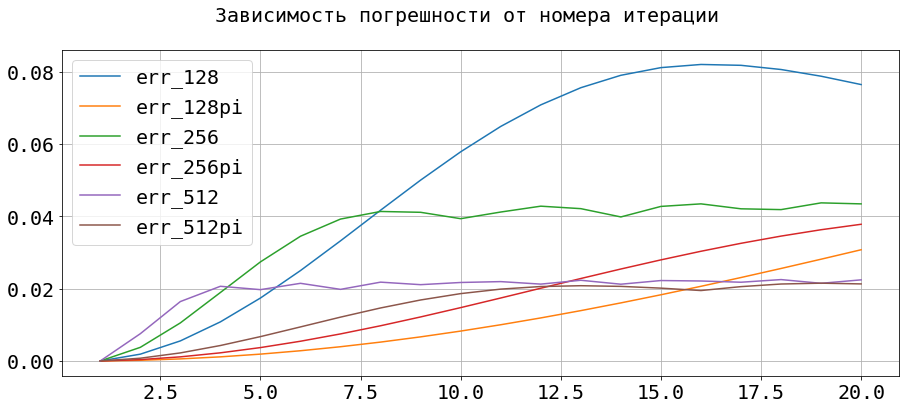

In [39]:
n = np.arange(20)+1

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

ax.plot(n, err_128, label="err_128")
ax.plot(n, err_128pi, label="err_128pi")
ax.plot(n, err_256, label="err_256")
ax.plot(n, err_256pi, label="err_256pi")
ax.plot(n, err_512, label="err_512")
ax.plot(n, err_512pi, label="err_512pi")
ax.grid()
ax.legend()

fig.suptitle("Зависимость погрешности от номера итерации", fontsize=20)


plt.show()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])